<a href="https://colab.research.google.com/github/anirbansen3027/Practice/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

In [45]:
#importing dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
df = df[df.target < 2]
df.target.unique()

array([0, 1])

In [47]:
X = df.drop(["target"],axis = 1)
y = df["target"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle =True, random_state = 123, stratify = y)

In [49]:
y_train.mean(), y_test.mean()

(0.5, 0.5)

In [50]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train,y_train)
preds = model.predict_proba(X_test)

In [51]:
roc_auc_score(y_test, preds[:,1])

1.0

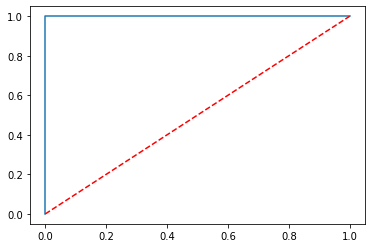

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, preds[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')